# X-ray diffraction phase analysis

**Мета роботи:** навчитися проводити аналіз результатів, отриманих методом рентгеноструктурного фазового аналізу, – розраховувати міжплощинні відстані та розмір областей когерентного розсіювання.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Хід виконання роботи

Матеріал досліджуваної тонкої плівки, а також параметри її термічної обробки надаються викладачем. Також повідомляється матеріал аноду, у випромінюванні якого проводились рентгеноструктурні дослідження.

> Досліджувались тонкі плівки FePt (30 нм) після відпалів у двох атмосферах - азоту і суміші аргону з воднем. 

**Досліджуваний плівковий матеріал** $FePt\,(30\,\text{нм})$

**Атмосфери в який відпалювався зразок** $H_2\!+\!Ar$ і $N_2$

**Анодний матеріал** $Cu,\, \lambda_{Cu} = 1.54184\,Å$

**Температури відпалу** 500, 600, 700, 800 K

In [2]:
Lambda = 1.54184
temperatures = [f'{temperature}K' for temperature in range(500, 801, 100)]
temperatures

['500K', '600K', '700K', '800K']

Будуються дифрактограми досліджуваної тонкої плівки з використанням наданих викладачем вихідних результатів рентгеноструктурного аналізу (дифрактограми будуються на одному графіку одна поверх іншої у порядку зростання температури відпалу).

In [3]:
files = {
    'N2': sorted(glob.glob('./data/XDPA/*N2.txt')),
    'Ar+H2': sorted(glob.glob('./data/XDPA/*Ar+H2.txt')),
}
files

{'Ar+H2': ['./data/XDPA/FePt_500_Ar+H2.txt',
  './data/XDPA/FePt_600_Ar+H2.txt',
  './data/XDPA/FePt_700_Ar+H2.txt',
  './data/XDPA/FePt_800_Ar+H2.txt'],
 'N2': ['./data/XDPA/FePt_500_N2.txt',
  './data/XDPA/FePt_600_N2.txt',
  './data/XDPA/FePt_700_N2.txt',
  './data/XDPA/FePt_800_N2.txt']}

In [4]:
afterdep = pd.read_csv(glob.glob('./data/XDPA/*after_deposition.txt')[0],
                   sep='\t',
                   header=-1,
                   names=['angle', 'afterdep'],
                      index_col=0)
afterdep.head()

,afterdep
angle,
20.00,11.0
20.04,13.0
20.08,11.0
20.12,7.5
20.16,9.5


In [5]:
micolumns = pd.MultiIndex.from_tuples([(treat, T) for treat in ['N2', 'Ar+H2'] for T in temperatures])
data = pd.DataFrame(columns=micolumns,
                    index=afterdep.index)
for treat, diffs in files.items():
    for T, diff in zip(temperatures, diffs):
        data[treat, T] = np.genfromtxt(diff, delimiter='\t')[:, 1]
data.head()

N2                       Ar+H2                     
       500K  600K      700K  800K  500K 600K      700K  800K
angle                                                       
20.00  23.0  17.0  11.66670  13.0  14.0  8.0   2.50000  17.0
20.04  12.0  11.0   7.50000  14.0  10.0  8.0  10.00000  21.0
20.08  17.0   8.0  11.66670  15.0  13.0  6.0   9.16667  11.0
20.12  12.0  18.0   8.33333  16.0  20.0  7.0   7.50000  19.0
20.16  11.0  18.0   7.50000  20.0  17.0  9.0   9.16667  14.0

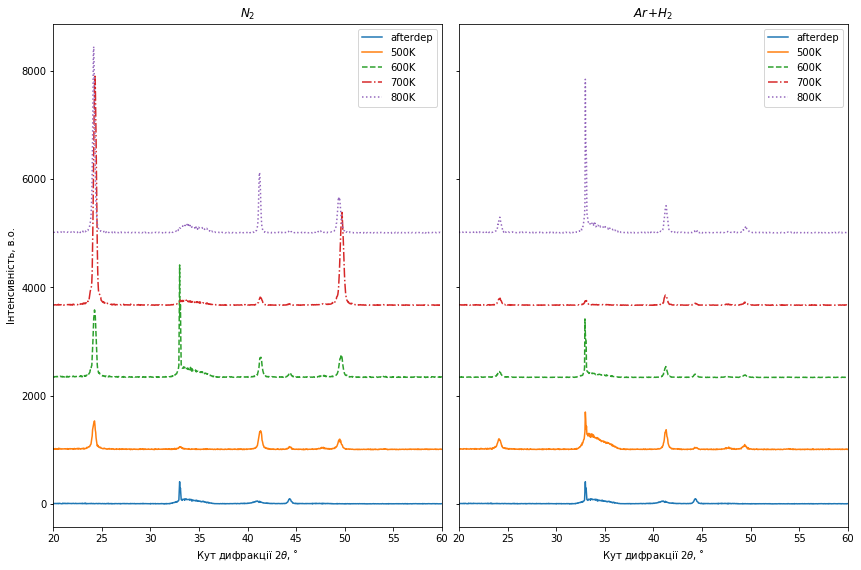

In [6]:
latex_dct = {'N2': '$N_2$', 'Ar+H2': '$Ar\!+\!H_2$'}
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 8))
for col, treat in enumerate(['N2', 'Ar+H2']):
    afterdep.plot(ax=ax[col], label='After Deposition')
    (data[treat] + np.linspace(1000, 5000, num=4)).plot(ax=ax[col], style=['-', '--', '-.', ':'])
    ax[col].set_title(latex_dct[treat])
    ax[col].set_ylabel("Інтенсивність, в.о.")
    ax[col].set_xlabel(r"Кут дифракції $2\theta$, ˚")
plt.tight_layout(1)
plt.xlim(20.0, 60.0)
plt.savefig('./report/images/xdpa_diffs.pdf')

На кожній дифрактограмі нумеруються дифракційні максимуми і розраховуються відповідні міжплощинні відстані.

In [7]:
traces = [go.Scatter(
    x=data['N2', T].index,
    y=data['N2', T],
    name=T
) for T in temperatures]
py.iplot(traces, filename='basic-line')

PlotlyRequestError: No message

In [346]:
traces = [go.Scatter(
    x=data['Ar+H2', T].index,
    y=data['Ar+H2', T],
    name=T
) for T in temperatures]
py.iplot(traces, filename='basic-line')

In [8]:
peaks_data = {
    'N2': {
        '500K': np.array([24.24, 33.04, 41.32, 44.28, 49.48]),
        '600K': np.array([24.24, 33.00, 41.32, 44.32, 49.60]),
        '700K': np.array([24.28, 33.08, 41.28, 44.28, 49.72]),
        '800K': np.array([24.16, 33.76, 41.20, 44.32, 49.36])
    },
    'Ar+H2': {
        '500K': np.array([24.12, 33.00, 41.32, 44.32, 49.40]),
        '600K': np.array([24.08, 32.96, 42.28, 44.32, 49.44]),
        '700K': np.array([24.16, 33.12, 41.24, 44.32, 49.44]),
        '800K': np.array([24.20, 33.00, 41.32, 44.32, 49.48])
    }
}
afterdep_idx = [33.0, 41.0, 44.36]

In [9]:
df = pd.DataFrame(afterdep_idx, index=np.arange(1, 4), columns=['2theta'])
df['theta'] = df['2theta'] / 2
df['sintheta'] = (df['theta'] * np.pi / 180).apply(np.sin)
df['d/n'] = Lambda / (2 * df['sintheta'])
print(df.round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  2theta &  theta &  sintheta &   d/n \\
\midrule
1 &   33.00 &  16.50 &      0.28 &  2.71 \\
2 &   41.00 &  20.50 &      0.35 &  2.20 \\
3 &   44.36 &  22.18 &      0.38 &  2.04 \\
\bottomrule
\end{tabular}



In [411]:
for treat, value in peaks_data.items():
    for T, peaks in value.items():
        df = pd.DataFrame(peaks_data[treat][T], index=np.arange(1, 6), columns=['2theta'])
        df['theta'] = df['2theta'] / 2
        df['sintheta'] = (df['theta'] * np.pi / 180).apply(np.sin)
        df['d/n'] = Lambda / (2 * df['sintheta'])
        print()
        print(f'{treat}: T = {T}')
        print(df.round(2).to_latex())


N2: T = 500K
\begin{tabular}{lrrrr}
\toprule
{} &  2theta &  theta &  sintheta &   d/n \\
\midrule
1 &   24.24 &  12.12 &      0.21 &  3.67 \\
2 &   33.04 &  16.52 &      0.28 &  2.71 \\
3 &   41.32 &  20.66 &      0.35 &  2.19 \\
4 &   44.28 &  22.14 &      0.38 &  2.05 \\
5 &   49.48 &  24.74 &      0.42 &  1.84 \\
\bottomrule
\end{tabular}


N2: T = 600K
\begin{tabular}{lrrrr}
\toprule
{} &  2theta &  theta &  sintheta &   d/n \\
\midrule
1 &   24.24 &  12.12 &      0.21 &  3.67 \\
2 &   33.00 &  16.50 &      0.28 &  2.71 \\
3 &   41.32 &  20.66 &      0.35 &  2.19 \\
4 &   44.32 &  22.16 &      0.38 &  2.04 \\
5 &   49.60 &  24.80 &      0.42 &  1.84 \\
\bottomrule
\end{tabular}


N2: T = 700K
\begin{tabular}{lrrrr}
\toprule
{} &  2theta &  theta &  sintheta &   d/n \\
\midrule
1 &   24.28 &  12.14 &      0.21 &  3.67 \\
2 &   33.08 &  16.54 &      0.28 &  2.71 \\
3 &   41.28 &  20.64 &      0.35 &  2.19 \\
4 &   44.28 &  22.14 &      0.38 &  2.05 \\
5 &   49.72 &  24.86 &      0.

За найбільш інтенсивним присутнім на дифрактограмі рефлексом розраховується розмір областей когерентного розсіювання. Далі необхідно побудувати графік температурної залежності ОКР.

In [13]:
Lambda

1.54184

In [23]:
theta = np.array([41.00, 41.32, 42.28, 41.24, 41.32, 41.32, 41.32, 42.28, 41.20]) * np.pi / 180 /2
I = np.array([50.5, 356, 199, 179, 491, 337, 360, 140, 1103])
B = np.array([1.00, 0.36, 0.37, 0.4, 0.37, 0.39, 0.35, 0.39, 0.23]) * np.pi / 180

D = 0.9 * Lambda / (B * np.cos(theta))
(D / 10).round(2)

array([ 8.49, 23.6 , 23.04, 21.24, 22.97, 21.79, 24.28, 21.86, 36.93])

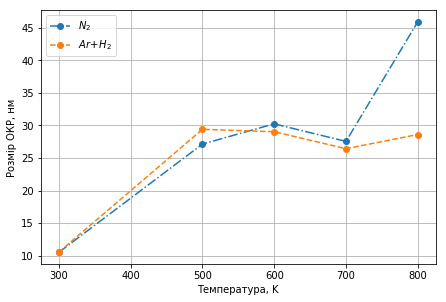

In [24]:
D_dict = {
    'Ar+H2': np.array([10.53, 29.41, 29.04, 26.43, 28.61]),
    'N2': np.array([10.5, 27.14, 30.25, 27.55, 45.94])
}
Temps = np.array([300, 500, 600, 700, 800])
plt.plot(Temps, D_dict['N2'], 'o-.', label=r'$N_2$')
plt.plot(Temps, D_dict['Ar+H2'], 'o--', label=r'$Ar\!+\!H_2$')
plt.legend()
plt.ylabel(r'Розмір ОКР, нм')
plt.xlabel(r'Температура, K')
plt.grid()
plt.tight_layout(0)
plt.savefig('./report/images/d.pdf')

Зробити висновки щодо впливу параметрів термічної обробки на розмір зерен досліджуваного плівкового матеріалу.

## Висновки

In [17]:
10.53/1.48

7.114864864864865

In [19]:
(np.arange(2, 7) * 10.53/1.48).round(2)

array([14.23, 21.34, 28.46, 35.57, 42.69])